# BSD68 Denoising Dataset

In [2]:
import os

current_dir = os.getcwd()
print("Current directory:", current_dir)

Current directory: /home/mkang2/Convolutional-Nearest-Neighbor/Testing


In [1]:
# Torch
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch import optim 
from torchsummary import summary
from torchvision.transforms import v2
import numpy as np


# Train + Data 
import sys 
sys.path.append('../Layers')
from Conv1d_NN import *
from Conv2d_NN import *
from Conv1d_NN_spatial import * 

from Conv2d_NN_spatial import * 
from ConvNN_CNN_Branching import *

sys.path.append('../Data')
from CBSD68 import *


sys.path.append('../Models')
from denoising_models import * 

sys.path.append('../Train')
from train2d import * 



import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

import torch 
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets


In [2]:
noisycbsd68 = NoisyCBSD68_dataset(batch_size=32, noise_std=0.3)

In [3]:
print(len(noisycbsd68.train_data))
print(len(noisycbsd68.test_data))
print(len(noisycbsd68.test_data[0]))
print(noisycbsd68.train_data[0][0].shape)


200
40
3
torch.Size([3, 200, 200])


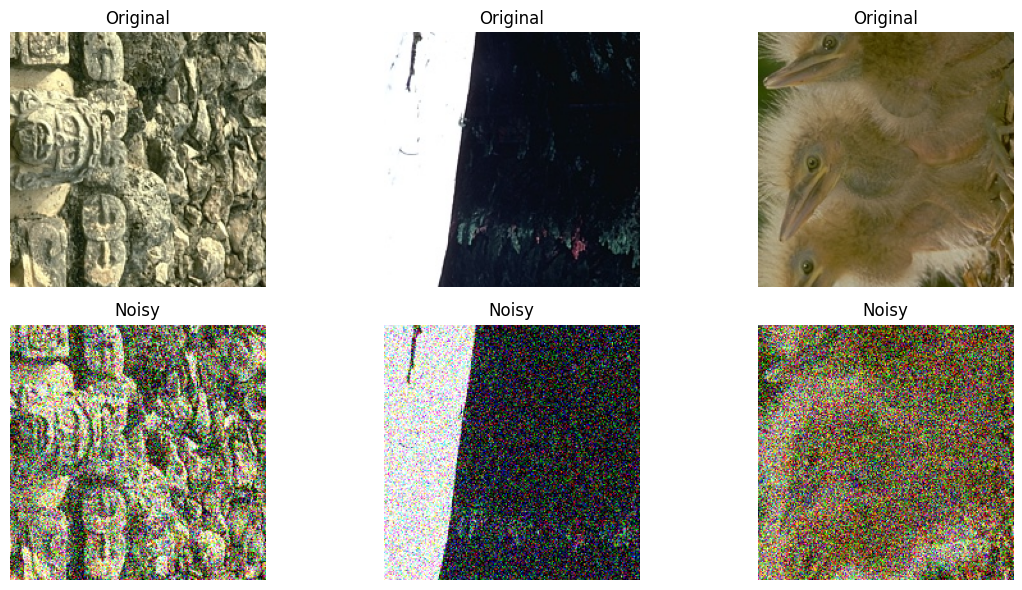

In [4]:
noisycbsd68.visual(3)

### Control CNN Model



Epoch 1, Time: 0.5454819202423096, Loss: 0.20037333241530828
Epoch 2, Time: 0.5435218811035156, Loss: 0.04830605802791459
Epoch 3, Time: 0.547405481338501, Loss: 0.028501623709286963
Epoch 4, Time: 0.5382230281829834, Loss: 0.030094967622842108
Epoch 5, Time: 0.5363638401031494, Loss: 0.022044152819684575
Epoch 6, Time: 0.5416901111602783, Loss: 0.019460760056972504
Epoch 7, Time: 0.5414211750030518, Loss: 0.017237677904111997
Epoch 8, Time: 0.5494480133056641, Loss: 0.014292040706745215
Epoch 9, Time: 0.5530340671539307, Loss: 0.011477041856518813
Epoch 10, Time: 0.5443496704101562, Loss: 0.010863982274063997

 Average epoch time: 0.544093918800354
Average loss on test set: 0.011241349391639233
Average PSNR on test set: 19.39368724822998


RuntimeError: PyTorch is not linked with support for mps devices

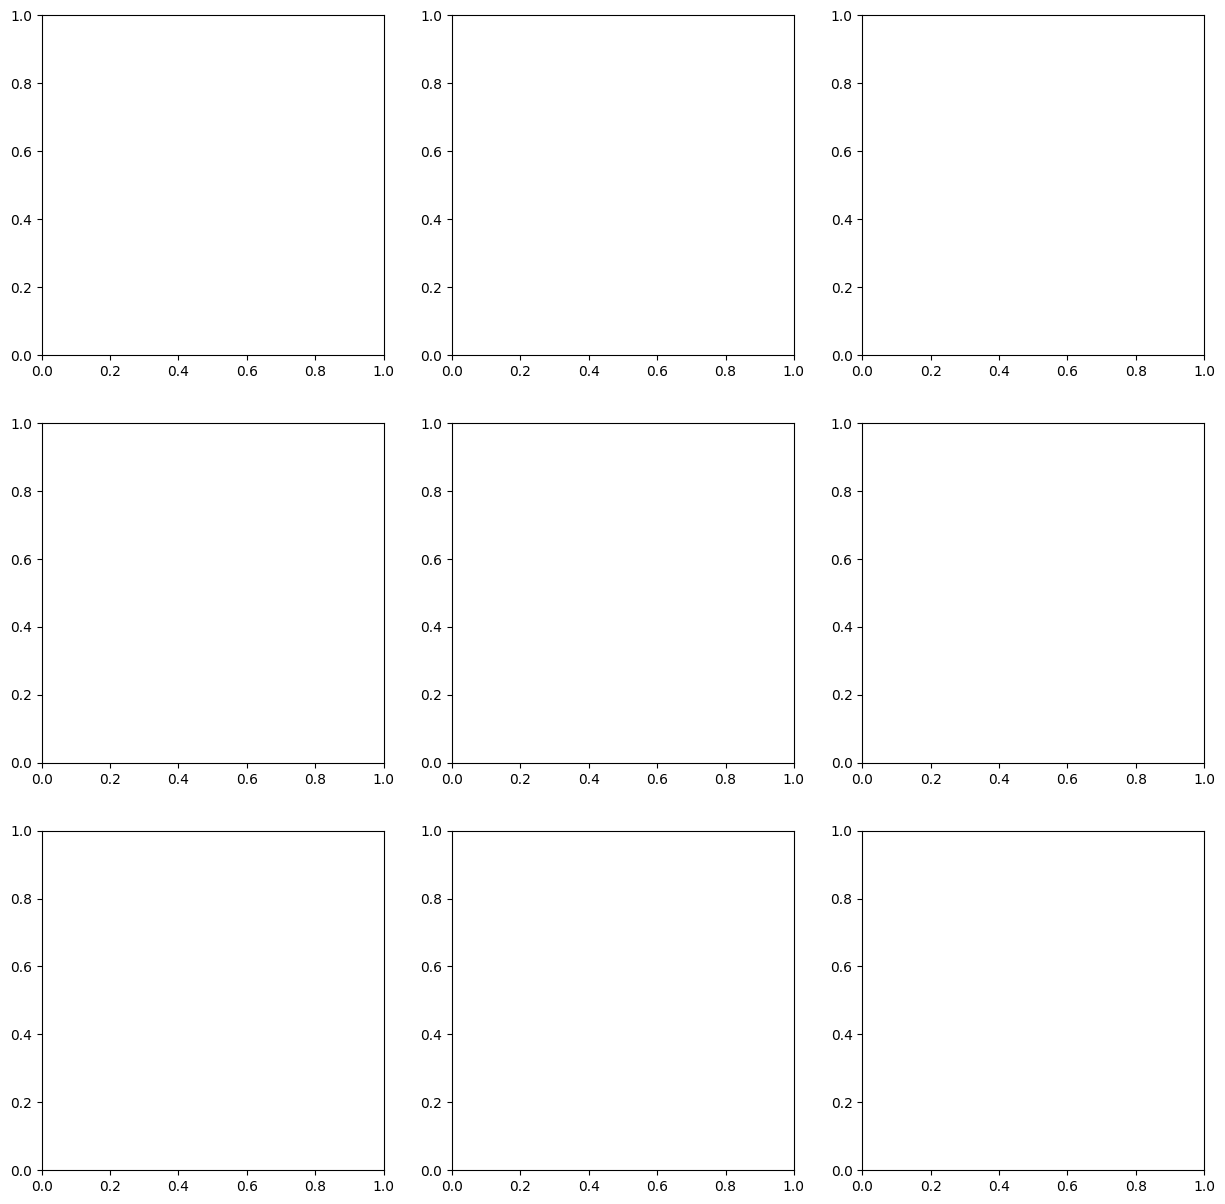

In [6]:
# CNN control model 
CNN = DenoisingCNN(in_ch=3, out_ch=3, kernel_size=3, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(CNN.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(CNN, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(CNN, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(CNN, noisycbsd68.test_loader, criterion, device='cuda')


# Print out output of trained model
test_denoise_visual_CBSD(CNN, noisycbsd68.test_data, device='cuda')


## Branching Model

In [ ]:
# Denoising Branching CNN + ConvNN Spatial, K = 9, N = 8 (64), 16:1
denoisingbranching_convNN_spatial_K_N_16_16 = DenoisingBranching_ConvNN_2D_Spatial_K_N(in_ch=3, out_ch=3, K=3, N=5, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_spatial_K_N_16_16.parameters(), lr=0.001)
num_epochs = 10
train_denoising_model(denoisingbranching_convNN_spatial_K_N_16_16, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoisingbranching_convNN_spatial_K_N_16_16, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoisingbranching_convNN_spatial_K_N_16_16, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoisingbranching_convNN_spatial_K_N_16_16, noisycbsd68.test_data, device='cuda')


In [ ]:
# Denoising Branching CNN + ConvNN Spatial, K = 9, N = 8 (64), 16:1
denoisingbranching_convNN_K_N_16_16 = DenoisingBranching_ConvNN_2D_K_N(in_ch=3, out_ch=3, K=3, N=25, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_K_N_16_16.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(denoisingbranching_convNN_K_N_16_16, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoisingbranching_convNN_K_N_16_16, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoisingbranching_convNN_K_N_16_16, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoisingbranching_convNN_K_N_16_16, noisycbsd68.test_data, device='cuda')



In [ ]:
# ConvNN K = 3, N = 25
denoising_convNN_2D_K_N = DenoisingConvNN_2D_K_N(in_ch=3, out_ch=3, K=3, N=25, device='cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(denoising_convNN_2D_K_N.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(denoising_convNN_2D_K_N, noisycbsd68.train_loader, criterion, optimizer, num_epochs, device='cuda')
evaluate_denoising_accuracy(denoising_convNN_2D_K_N, noisycbsd68.test_loader, criterion, device='cuda')
evaluate_accuracy_psnr(denoising_convNN_2D_K_N, noisycbsd68.test_loader, criterion, device='cuda')

# Print out output of trained model
test_denoise_visual_CBSD(denoising_convNN_2D_K_N, noisycbsd68.test_data, device='cuda')

